<a href="https://colab.research.google.com/github/anatasyatata/Portofolio/blob/main/Twitter%20Analysis%20Gempa%20Cianjur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KELOMPOK 10**
* Anatasya Oktaviani Handriati (1906296186)
* Athaya Yumna Fathiyah (1906296192)
* Chika Ramadhani (1906374004)
* Vania Adisaputri (1906296362)

# **Link Video Presentasi**

https://drive.google.com/file/d/1nNFF3VmwSDDkBnATiU7k9ZBmVZT3ET7K/view?usp=share_link

# **1. Pendahuluan**

# **Latar Belakang**

**Pada era globalisasi, pengguna media sosial semakin banyak.Media sosial memberikan kemudahan bagi pengguna dalam berkomunikasi dan menyebarkan informasi. Terdapat berbagai macam media sosial yang digunakan oleh masyarakat saat ini, salah satunya adalah twitter. Twitter adalah suatu situs yang dapat memuat  teks, foto, video, dan juga tautan. Antar pengguna twitter pun dapat saling berkomentar terhadap informasi yang dibagikan. Percakapan antar pengguna ini terkadang menunjukkan isu yang sedang terjadi, misalnya terkait dengan kejadian gempa di Jawa Barat. Pembicaraan gempa di jawa barat yang ada di media sosial semakin banyak, terlebih saat adanya gempa di tahun 2022 yang terjadi secara berulang kali dan menimbulkan kerusakan dan korban jiwa yang banyak.**

# **Rumusan Masalah**



1.   **Pada saat kapan tweet gempa sering muncul di media sosial twitter?**
​
2.   **Tweet apa saja yang dominan diunggah oleh pengguna twitter terkait dengan gempa di Jawa Barat?**

3. **Akun apa saja yang dominan mengunggah tweet mengenai gempa di Jawa Barat?​**

4. **Akun apa saja yang berperan penting dalam penyebaran informasi mengenai gempa di Jawa Barat?​**



# **2. Import Package dan Data**

**Pertama-tama akan dilakukan install dan import package yang akan digunakan.**

In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --user -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()
sns.set(style="ticks", color_codes=True)
random_state = 170
'Done'

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'Done'

 **Kemudian, dilakukan import data dari data csv yang sudah didapat sebelumnya melalui *scraping* data twitter. Untuk lampiran *code* yang digunakan scraping data twitter, dilampirkan dalam file pdf di dalam zip.**

In [ ]:
# Loading Data:
df = pd.read_csv(r"https://raw.githubusercontent.com/ayumnaf/ProyekKelompok10/main/datafix.csv ",
                 low_memory = False, encoding='utf8', lineterminator = '\n' )
df

,index,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1606527734733279234,1606527734733279234,1.671861e+12,2022-12-24 05:50:34,0,NaN,#Earthquake (#gempa) M2.7 strikes 17 km NE of ...,en,"['earthquake', 'gempa', 'sukabumi', 'indonesia']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,1606520376477220865,1606520376477220865,1.671859e+12,2022-12-24 05:21:20,0,NaN,Garis Sukabumi Raya Lakukan Trauma Healing unt...,in,"['sukabuminews', 'medialokalberwawasaninternas...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,1606325850437189635,1606325850437189635,1.671813e+12,2022-12-23 16:28:21,0,NaN,"Jumat Siang Ini Sukabumi Diguncang Gempa 3,1 M...",in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1606257207204536320,1606257207204536320,1.671797e+12,2022-12-23 11:55:35,0,NaN,#Earthquake (#gempa) M2.7 strikes 25 km NE of ...,en,"['earthquake', 'gempa', 'sukabumi', 'indonesia']",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,1606202342273175552,1606202342273175552,1.671783e+12,2022-12-23 08:17:34,0,NaN,BMKG Deteksi Gempa Magnitudo 3.1 di Kabupaten ...,in,"['bmkg', 'gempa', 'gempaterkini', 'gempasukabu...",...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22317,166,1594948658201759744,1594867069102727171,1.669100e+12,2022-11-22 06:59:27,0,NaN,LAZISNU PBNU bersama LPBINU mulai menyalurkan ...,in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
22318,167,1594939005258244096,1594939005258244096,1.669098e+12,2022-11-22 06:21:06,0,NaN,Assalamualaikum Wr. Wb. Posko Bencana Terdampa...,in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
22319,168,1483091220352024576,1483091220352024576,1.642431e+12,2022-01-17 14:57:56,0,NaN,"Di Pandeglang, relawan Front Persaudaraan Isla...",in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
22320,169,4575925077,4575925077,1.254563e+12,2009-10-03 09:35:31,0,NaN,knp pas bencana situ gintung byk posko2 partai...,in,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


# **3. Feature Selection**

**Selanjutnya akan dilakukan pemilihan kolom data yang akan digunakan, yaitu day, `date`, `username`, `tweet`, `nlikes`, `nreplies`, dan `nretweets`. Kolom lainnya tidak digunakan karena mengandung terlalu banyak missing value dan beberapa tidak diperlukan dalam analisis data ini. Seperti `id` tidak digunakan karena terlalu unik datanya, kemudian `place` tidak digunakan karena memiliki terlalu banyak missing value, dan lain sebagainya.**

In [ ]:
data = df[['day','date','username','tweet','nlikes','nreplies','nretweets']]
data

,day,date,username,tweet,nlikes,nreplies,nretweets
0,6,2022-12-24 05:50:34,EMSC,#Earthquake (#gempa) M2.7 strikes 17 km NE of ...,1,0,0
1,6,2022-12-24 05:21:20,sukabumiNewsnet,Garis Sukabumi Raya Lakukan Trauma Healing unt...,0,0,0
2,5,2022-12-23 16:28:21,KuretaID,"Jumat Siang Ini Sukabumi Diguncang Gempa 3,1 M...",0,0,0
3,5,2022-12-23 11:55:35,EMSC,#Earthquake (#gempa) M2.7 strikes 25 km NE of ...,3,0,1
4,5,2022-12-23 08:17:34,sofi_hwajiyong,BMKG Deteksi Gempa Magnitudo 3.1 di Kabupaten ...,1,0,0
...,...,...,...,...,...,...,...
22317,2,2022-11-22 06:59:27,nahdlatululama,LAZISNU PBNU bersama LPBINU mulai menyalurkan ...,22,1,2
22318,2,2022-11-22 06:21:06,dtoni77,Assalamualaikum Wr. Wb. Posko Bencana Terdampa...,1,0,0
22319,1,2022-01-17 14:57:56,MCAOps,"Di Pandeglang, relawan Front Persaudaraan Isla...",1398,31,337
22320,6,2009-10-03 09:35:31,bebebonta,knp pas bencana situ gintung byk posko2 partai...,1,0,0


# **4. Preprocessing**

## **4.1 Mengganti Data Type**

**Dilihat terlebih dahulu tipe data dari masing-masing kolom**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22322 entries, 0 to 22321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   day        22322 non-null  int64 
 1   date       22322 non-null  object
 2   username   22322 non-null  object
 3   tweet      22322 non-null  object
 4   nlikes     22322 non-null  int64 
 5   nreplies   22322 non-null  int64 
 6   nretweets  22322 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.2+ MB


**Terlihat bahwa terdapat tipe data yang perlu diganti, yaitu:**
1.   **tipe data dari `date`**

      **Tipe data dari `date` akan diubah menjadi tipe data datetime.**

2.   **tipe data dari `username` dan `tweet`**

     **Tipe data dari `username` dan `tweet` akan diubah menjadi tipe data string. Agar dapat diproses dan dianalisis lebih lanjut.**

In [ ]:
data['date']=pd.to_datetime(data['date'])
data['username']=data['username'].astype('str')
data['tweet']=data['tweet'].astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22322 entries, 0 to 22321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   day        22322 non-null  int64         
 1   date       22322 non-null  datetime64[ns]
 2   username   22322 non-null  object        
 3   tweet      22322 non-null  object        
 4   nlikes     22322 non-null  int64         
 5   nreplies   22322 non-null  int64         
 6   nretweets  22322 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 1.2+ MB


**Tipe data dari `date`, `username`, dan `tweet` sudah terganti**

## **4.2 Pengecekan Duplicated Data**

**Dilakukan pengecekan data yang duplikat dari dataframe `data`**

In [ ]:
data.duplicated().sum()

2703

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

**Didapat bahwa terdapat 2.703 data yang duplikat dan data-data tersebut sudah dihapus dari dataframe.**

---



## **4.3 Pengecekan *Missing Value* pada `data`**



In [ ]:
data.isnull().sum()

day          0
date         0
username     0
tweet        0
nlikes       0
nreplies     0
nretweets    0
dtype: int64

**Didapat bahwa tidak ada *missing value* pada data.**

In [ ]:
data.to_csv(r'data.csv', index=False, encoding='utf8')

**Kemudian, data diubah menjadi dalam bentuk csv untuk dilakukan *preprocessing*. Seperti mencari kata-kata tidak baku, dan *stopwords*.**

## **4.4 Tokenizing**

**Selanjutnya, data pada kolom `tweet` akan dibersihkan terlebih dahulu. Yang pertama akan dilakukan tokenizing. Didefinisikan sebuah fungsi yaitu fungsi tokenizing(txt) yang digunakan untuk memisahkan hashtags, mengubah tweet menjadi huruf kecil, menghapus email, menghapus mention, menghapus url, menghapus simbol-simbol, dan menghapus angka. Hal ini bertujuan agar saat dilakukan visualisasi data menjadi lebih bersih dan dapat memudahkan pengambilan insights.**

In [ ]:
def tokenizing(txt):
    docx = txt
    getHashtags = re.compile(r"#(\w+)")
    pisahtags = re.compile(r'[A-Z][^A-Z]*')
    tagS = re.findall(getHashtags, docx)
    for tag in tagS:
      proper_words = ' '.join(re.findall(pisahtags, tag))
      docx = docx.replace('#' + tag,proper_words) #pisahin hashtag
    docx = (docx.lower().strip()) #huruf kecil
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    emailPattern = re.compile(r'[\w._%+-]+@[\w\.-]+\.[a-zA-Z]{2,4}')
    mentionPattern = re.compile(r'@([a-zA-Z0-9]{1,15})')
    docx = re.sub(emailPattern, ' ', docx) #hapus email
    docx = re.sub(mentionPattern,' ',docx) #hapus mention
    docx = re.sub(urlPattern,' ', docx) #hapus url
    docx = re.sub(r'[^\w]',' ',docx) #hapus simbol
    docx = re.sub(r'[^a-zA-Z]',' ',docx) #hapus angka
    return str(docx)

**Selanjutnya, dibuat kolom baru yaitu kolom cleantweet untuk menyimpan data `tweet` yang telah dibersihkan. Untuk langkah pertama, kolom cleantweet tersebut diisi dengan tweet yang telah diperbaiki dengan fungsi tokenizing**

In [ ]:
data['cleantweet'] = ' ' # inititate kolom kosong
for idx, post in tqdm(data.iterrows()):
    data.at[idx, 'cleantweet'] = tokenizing(post.tweet)

data.head()

19619it [00:02, 7141.14it/s]


,day,date,username,tweet,nlikes,nreplies,nretweets,cleantweet
0,6,2022-12-24 05:50:34,EMSC,#Earthquake (#gempa) M2.7 strikes 17 km NE of ...,1,0,0,earthquake m strikes km ne of sukabum...
1,6,2022-12-24 05:21:20,sukabumiNewsnet,Garis Sukabumi Raya Lakukan Trauma Healing unt...,0,0,0,garis sukabumi raya lakukan trauma healing unt...
2,5,2022-12-23 16:28:21,KuretaID,"Jumat Siang Ini Sukabumi Diguncang Gempa 3,1 M...",0,0,0,jumat siang ini sukabumi diguncang gempa m...
3,5,2022-12-23 11:55:35,EMSC,#Earthquake (#gempa) M2.7 strikes 25 km NE of ...,3,0,1,earthquake m strikes km ne of sukabum...
4,5,2022-12-23 08:17:34,sofi_hwajiyong,BMKG Deteksi Gempa Magnitudo 3.1 di Kabupaten ...,1,0,0,bmkg deteksi gempa magnitudo di kabupaten ...


## **4.5 Normalisasi**

**Setelah melakukan tokenizing, akan dilakukan normalisasi. Normalisasi dilakukan untuk mengganti kata yang tidak baku menjadi baku dan memperbaiki singkatan kata. Sebelum melakukan normalisasi, dibuat terlebih dulu dictionary `D` yang berisi kata tidak baku dan kata baku serta singkatan dan kepanjangan dari singkatan tersebut. Kata-kata ini didapatkan setelah melihat data melalui file csv.**

In [ ]:
D = {'ne' : 'northeast',
'sw' : 'southwest',
'kab' : 'kabupaten',
'jabar' : 'jawa barat',
'mag' : 'magnitudo',
'kedlmn' : 'kedalaman',
'dlm' : 'dalam',
'bbrp' : 'beberapa',
'stlh' : 'setelah',
'gmp' : 'gempa',
'blm' : 'belum',
'tlh' : 'telah',
'mekindungi' : 'melindungi',
'sy' : 'saya',
'kab' : 'kabupaten',
'yg' : 'yang',
'grgr' : 'gara gara',
'aing' : 'saya',
'skrg' : 'sekarang',
'gak' : 'tidak',
'nu' : 'naudatul ulama',
'kemarin2' : 'kemarin',
'2x' : 'dua kali',
'beneran' : 'benar',
'bener' : 'benar benar',
'pala' : 'kepala',
'gatel' : 'gatal',
'bgt' : 'banget',
'tp' : 'tapi',
'msh' : 'masih',
'yaallah' : 'ya allah',
'meronta2' : 'meronta ronta',
'ci anjur' : 'cianjur',
'pengandaran' : 'pangandaran',
's' : 'south',
'baratdaya' : 'barat daya',
'sering2' : 'sering sering',
'ambles' : 'amblas',
'palabuhanratu' : 'pelabuhan ratu',
'ga' : 'tidak',
'berturut2' : 'berturut turut',
'pp' : 'pulang-pergi',
'kurleb' : 'kurang lebih',
'emg' : 'memang',
'mak' : 'ibu',
'sprti' : 'seperti',
'maknya' : 'ibunya',
'nyander' : 'bersandar',
'kaga' : 'tidak',
'jg' : 'juga',
'msi' : 'masih',
'wa' : 'whatsapp',
'sm' : 'sama' ,
'cht' : 'chat',
'tbtb' : 'tiba tiba',
'ngecht' : 'chat',
'gangerasa' : 'tidak merasakan',
'yaallah' : 'ya allah',
'kmren' : 'kemarin' ,
'loe' : 'kamu',
'gitu' : 'begitu',
'dh' : 'sudah',
'kek' : 'seperti',
'ak' : 'aku',
'yaa' : 'iya',
'hrs' : 'harus',
'gue' : 'aku',
'kerasa' : 'terasa',
'lg' : 'lagi',
'jiuga' : 'juga',
'dom' : 'domisili',
'staysave' : 'stay safe',
'lok' : 'lokasi',
'tapi' : 'tetapi',
'pagi2' : 'pagi pagi',
'goyang2' : 'goyang goyang',
'karna' : 'karena',
'brita' : 'berita',
'kmrn' : 'kemarin',
'smoga' : 'semoga',
'baik2' : 'baik baik',
'aja' : 'saja',
'cmas' : 'cemas',
'podkesan' : 'podcast',
'sw' : 'southwest',
'kl' : 'kalau',
'dr' : 'dari',
'astaghfirullohaldziim' : 'astaghfirullah',
'sihh' : 'sih',
'keleyengan' : 'pusing',
'dirasa2' : 'dirasa rasa',
'tanda2' : 'tanda tanda',
'jng' : 'jangan',
'dgn' : 'dengan',
'jkt' : 'jakarta',
'wakru' : 'waktu',
'pulkam' : 'pulang kampung',
'mayan' : 'lumayan',
'cmn' : 'cuma',
'smnjak' : 'semenjak',
'gw' : 'saya',
'lgi' : 'lagi',
'rebahn' : 'rebahan',
'menganalisa' : 'menganalisis',
'gua' : 'saya',
'lgsg' : 'langsung',
'asw' : 'asu',
'gempaa' : 'gempa',
'cikidot' : 'check it out',
'yaaa' : 'ya',
'tggl' : 'tanggal',
'mlm' : 'malam',
'sampe' : 'sampai',
'blm' : 'belum',
'hr' : 'hari',
'bwang' : 'bang',
'lemes' : 'lemas',
'motif' : 'notifikasi',
'gimana' : 'bagaimana',
'safff' : 'saf',
'kemaren' : 'kemarin',
'trs' : 'terus',
'gaksih' : 'tidak sih',
'nelpon' : 'menelepon',
'hayu' : 'ayo',
'ngadua ka' : 'berdoa ke',
'stunami' : 'tsunami',
'jawabarat' : 'jawa barat',
'wuihhh' : 'wah',
'coii' : 'hei',
'q g kerasa' : 'aku tidak terasa',
'jln' : 'jalan',
'ya alloh' : 'ya allah',
'dng' : 'dengan',
'imi' : 'ini',
'tdk' : 'tidak',
'ayangku' : 'sayangku',
'pdhl' : 'padahal',
'tkt' : 'takut',
'bag' : 'bagian',
'duhh' : 'duh',
'nihh' : 'nih',
'kann' : 'kan',
'lbh' : 'lebih',
'baik2' : 'baik baik',
'takuuuuuuut' : 'takut',
'yaa' : 'iya',
'tangsel' : 'tangerang selatan',
'abis' : 'habis',
'ktnya' : 'katanya',
'sya' : 'saya',
'plbbuaratu' : 'pelabuhan ratu',
'klw' : 'kalau',
'bersekala' : 'berskala',
'kmi' : 'kami',
'emang' : 'memang',
'smoga' : 'semoga',
'aamiin' : 'amin',
'yra' : 'ya rabbal alamin',
'tau' : 'tahu',
'men' : 'bro',
'td' : 'tadi',
'yaallah' : 'ya allah',
'was2' : 'was was',
'b aja' : 'biasa saja',
'kk' : 'kakak',
'ma' : 'ibu',
'lahhh' : 'lah',
'koo' : 'kok',
'ds' : 'desa',
'grmpa' : 'gempa',
'garie' : 'garis',
'nnti' : 'nanti',
'php' : 'pemberi harapan palsu',
'sodaranya' : 'saudaranya',
'kn' : 'kan',
'gpp' : 'tidak apa apa',
'yu' : 'kamu',
'kno' : 'tahu',
'la' : 'lah',
'smwa' : 'semua',
'cairin' : 'mencairkan',
'nelfon' : 'menelepon',
'huuu' : 'sedih',
'y' : 'iya',
'ebwiii' : 'abi',
'ngrasa' : 'merasakan',
'kemana2' : 'kemana mana' ,
'yaallahhh' : 'ya allah',
'udah' : 'sudah',
'hallo' : 'halo',
'bangey' : 'banget',
'soalnha' : 'soalnya',
'asikk' : 'asyik',
'hadeh' : 'aduh',
'bruh' : 'bro',
'sdh' : 'sudah',
'tenan' : 'tenang',
'iki' : 'ini',
'wes' : 'sudah',
'ono' : 'ada',
'3x' : 'tiga kali',
'gunungkidul' : 'gunung kidul',
'geteran' : 'getaran',
'mernurut' : 'menurut',
'ajah' : 'saja',
'ko' : 'kok',
'dmna2' : 'dimana mana',
'smg' : 'semoga',
'suaranyaaa' : 'suaranya',
'huhhh' : 'aduh',
'tmn' : 'teman',
'broo' : 'bro',
'4x' : 'empat kali',
'goyangggggg' : 'goyang',
'gini' : 'begini',
'gempabumi' : 'gempa bumi',
'gembong' : 'gendong',
'slalu' : 'selalu',
'knp' : 'kenapa',
'byk' : 'banyak',
'rame2' : 'rame rame',
'brt' : 'berarti',
'kereeen' : 'keren',
'klo' : 'kalau',
'aamiin' : 'amin',
'ceat' : 'cepat',
'twit' : 'tweet',
'in sya allah' : 'insha allah',
'sgt' : 'sangat',
'mantul' : 'mantap',
'abafi' : 'abadi',
'ok' : 'oke',
'kerenn' : 'keren',
'silaturrahiim' : 'silaturahmi',
'tak' : 'tidak',
'teman2' : 'teman teman',
'd' : 'di',
'tiap' : 'setiap',
'tijaua' : 'tinjau',
'ratusa' : 'ratusan',
'rakyata' : 'rakyat',
'nii' : 'nih',
'oia' : 'oh iya',
'mninggalnya' : 'meninggalnya',
'ghoib' : 'gaib',
'sbg' : 'sebagai',
'd7caci' : 'dicaci',
'kpd' : 'kepada',
'ad' : 'ada',
'ngga' : 'tidak',
'ae' : 'saja',
'baguna' : 'bangunan',
'samaaa' : 'sama',
'dri' : 'dari',
'beberapaa' : 'beberapa',
'mreka' : 'mereka',
'ttap' : 'tetap',
'wkwkwk' : 'hahaha',
'lu': 'kamu',
'aya' : 'ada',
'sbgai' : 'sebagai',
'rubuh' : 'roboh',
'tapii' : 'tapi',
'mw' : 'mau',
'males' : 'malas',
'nyumbang' : 'menyumbang',
'tmpt' : 'tempat',
'di beri' : 'diberi',
'Alhmdulillah' : 'alhamdulillah',
'ooh':'oh',
'amiin': 'amin',
'teman2yg':'teman teman yang',
'hahh':'hah',
'Alhamdulillaaaaah': 'Alhamdulillah',
'dpt':'dapat','ditlpn':'ditelepon',
'jm2':'jam 2',
'bkn':'bukan',
'telsh':'telah',
'pls':'tolong',
'dimana2': 'dimana mana',
'kt' : 'kita',
'ojol' : 'ojek online',
'kaltim' : 'kalimantan timur',
'w' : 'saya',
'kaya kemarin' : 'seperti kemarin',
'voc' : 'voucher',
'krn' : 'karena',
'gaakan' : 'tidak akan',
'ttng' : 'tentang',
'insya alloh' : 'insha allah',
'dah' : 'sudah',
'bangke' : 'bangkai',
'didepan' : 'di depan',
'bs' : 'bisa',
'masy' : 'masyarakat',
'baruuuu' : 'baru',
'barudaks' : 'anak anak',
'anjerrr' : 'astaga',
'cakep' : 'tampan',
'rame' : 'ramai',
'keknya' : 'kayaknya',
'parno' : 'takut',
'ilang' : 'hilang',
'klpk' : 'kelompok',
'mo' : 'mau',
'ambles' : 'amblas',
'nyampe' : 'sampai',
'sek' : 'sebentar',
'dewe' : 'sendiri',
'kondimen' : 'pelengkap',
'inget' : 'ingat',
'bhw' : 'bahwa',
'kp' : 'kampung',
'wkekwkw' : 'hahaha',
'kalo' : 'kalau',
'nak' : 'anak',
'Sillaaauu' : 'silau',
'lagii' : 'lagi',
'ambrol' : 'roboh',
'ngeliat' : 'ngelihat',
'slquraan' : 'alquraan',
'tegoran' : 'teguran',
'kec' : 'kecamatan',
'gabisa' : 'tidak bisa',
'macem' : 'macam',
'koq' : 'kok',
'bnrn' : 'beneran',
'tdi' : 'tadi',
'gk' : 'tidak',
'gada' : 'tidak ada',
'lok' : 'lokasi',
'wkwk' : 'haha',
'dugem' : 'dunia gemerlap',
'berentet' : 'beruntut',
'ancur' : 'hancur',
'huhhhh' : 'hah',
'yaaa' : 'ya',
'tbtb' : 'tiba tiba',
'blg' : 'bilang',
'broo' : 'bro',
'mengguncan' : 'mengguncang',
'dom' : 'domisili',
'kenceng' : 'kencang',
'cm' : 'cuma',
'diliat' : 'dilihat',
'krisi' : 'krisis',
'm' : 'magnitudo',
'km' : 'kilometer',
'kyk' : 'seperti',
'ngk' : 'tidak',
'kh' : 'kah',
'dg' : 'dengan',
'gatau' : 'tidak tahu',
'nemu' : 'ketemu',
'engga' : 'tidak',
'pgen' : 'ingin',
'mles': 'malas',
'sdg' : 'sedang',
'nyaa' : 'nya',
'krna' : 'karena',
'dekett' : 'dekat',
'ngab' : 'bang',
'sedapp' : 'sedap',
'mna' : 'mana',
'blum' : 'belum',
'ampir' : 'hampir',
'smua' : 'semua',
'kgt' : 'kaget',
'sekrang' : 'sekarang',
'berasa' : 'terasa'}

**Kemudian dibuat fungsi normalisasi(txt) untuk menormalisasikan semua kata pada cleantweet sebelumnya.**

In [ ]:
def normalisasi(txt):
  T = TextBlob(txt).words
  for i,t in enumerate(T):
    if t in D.keys():
      T[i] = D[t]
  teks = str(' '.join(T))
  return teks

**Setelah itu, data pada kolom cleantweet diupdate dengan menggunakan fungsi normalisasi, sehingga didapatkan sebagai berikut.**

In [ ]:
for idx, post in tqdm(data.iterrows()):
    data.at[idx, 'cleantweet'] = normalisasi(post.cleantweet)

data.head()

19619it [00:12, 1602.93it/s]


,day,date,username,tweet,nlikes,nreplies,nretweets,cleantweet
0,6,2022-12-24 05:50:34,EMSC,#Earthquake (#gempa) M2.7 strikes 17 km NE of ...,1,0,0,earthquake magnitudo strikes kilometer northea...
1,6,2022-12-24 05:21:20,sukabumiNewsnet,Garis Sukabumi Raya Lakukan Trauma Healing unt...,0,0,0,garis sukabumi raya lakukan trauma healing unt...
2,5,2022-12-23 16:28:21,KuretaID,"Jumat Siang Ini Sukabumi Diguncang Gempa 3,1 M...",0,0,0,jumat siang ini sukabumi diguncang gempa magni...
3,5,2022-12-23 11:55:35,EMSC,#Earthquake (#gempa) M2.7 strikes 25 km NE of ...,3,0,1,earthquake magnitudo strikes kilometer northea...
4,5,2022-12-23 08:17:34,sofi_hwajiyong,BMKG Deteksi Gempa Magnitudo 3.1 di Kabupaten ...,1,0,0,bmkg deteksi gempa magnitudo di kabupaten suka...


## **4.6 Filtering**

**Langkah selanjutnya adalah filtering. Filtering dilakukan untuk menghapus stopwords yang ada pada cleantweet. Hal ini dilakukan, agar saat dilakukan visualisasi tidak banyak kata tidak bermakna yang muncul menjadi kata yg dominan. Disini digunakan list stopwords dari package NLTK, serta ditambah dan dikurangkan beberapa kata. list stopwords tersebut disimpan dalam `hapus_kata`**

In [ ]:
hapus = stopwords.words('indonesian')
hapus.remove('tidak')
tambah = ['iya', 'mulu', 'banget', 'kok', 'nih', 'semoga', 'teh', 'deh','btw', '&gt', 'sih']
hapus_kata = hapus + tambah

**Kemudian, didefinisikan fungsi filtering(txt) untuk menghapus kata yang termasuk dalam `hapus_kata`.**

In [ ]:
def filtering(txt):
  text = TextBlob(txt).words
  text = [t for t in text if t not in hapus_kata]
  teks = str(' '.join(text))
  return teks

**Selanjutnya, data pada kolom cleantweet diupdate kembali dengan menggunakan fungsi filtering.**

In [ ]:
for idx, post in tqdm(data.iterrows()):
    data.at[idx, 'cleantweet'] = filtering(post.cleantweet)

data.head()

19619it [00:24, 807.78it/s] 


,day,date,username,tweet,nlikes,nreplies,nretweets,cleantweet
0,6,2022-12-24 05:50:34,EMSC,#Earthquake (#gempa) M2.7 strikes 17 km NE of ...,1,0,0,earthquake magnitudo strikes kilometer northea...
1,6,2022-12-24 05:21:20,sukabumiNewsnet,Garis Sukabumi Raya Lakukan Trauma Healing unt...,0,0,0,garis sukabumi raya lakukan trauma healing ana...
2,5,2022-12-23 16:28:21,KuretaID,"Jumat Siang Ini Sukabumi Diguncang Gempa 3,1 M...",0,0,0,jumat siang sukabumi diguncang gempa magnitudo
3,5,2022-12-23 11:55:35,EMSC,#Earthquake (#gempa) M2.7 strikes 25 km NE of ...,3,0,1,earthquake magnitudo strikes kilometer northea...
4,5,2022-12-23 08:17:34,sofi_hwajiyong,BMKG Deteksi Gempa Magnitudo 3.1 di Kabupaten ...,1,0,0,bmkg deteksi gempa magnitudo kabupaten sukabum...


## **4.7 Stemming**

**Selanjutnya dilakukan stemming. Stemming digunakan untuk menghasilkan kata dasar dengan cara menghilangkan imbuhan. Untuk melakukan stemming didefinisikan fungsi stem(txt).**

In [ ]:
def stem(txt):
  text_stem = stemmer.stem(txt)
  return text_stem

**Kemudian, data pada kolom cleantweet kembali diupdate dengan menggunakan fungsi stem.**

In [ ]:
for idx, post in tqdm(data.iterrows()):
  data.at[idx, 'cleantweet'] = stem(post.cleantweet)

data.head()

19619it [31:31, 10.37it/s]


,day,date,username,tweet,nlikes,nreplies,nretweets,cleantweet
0,6,2022-12-24 05:50:34,EMSC,#Earthquake (#gempa) M2.7 strikes 17 km NE of ...,1,0,0,earthquake magnitudo strikes kilometer northea...
1,6,2022-12-24 05:21:20,sukabumiNewsnet,Garis Sukabumi Raya Lakukan Trauma Healing unt...,0,0,0,garis sukabumi raya laku trauma healing anak a...
2,5,2022-12-23 16:28:21,KuretaID,"Jumat Siang Ini Sukabumi Diguncang Gempa 3,1 M...",0,0,0,jumat siang sukabumi guncang gempa magnitudo
3,5,2022-12-23 11:55:35,EMSC,#Earthquake (#gempa) M2.7 strikes 25 km NE of ...,3,0,1,earthquake magnitudo strikes kilometer northea...
4,5,2022-12-23 08:17:34,sofi_hwajiyong,BMKG Deteksi Gempa Magnitudo 3.1 di Kabupaten ...,1,0,0,bmkg deteksi gempa magnitudo kabupaten sukabum...


**Selanjutnya, data diubah menjadi file csv dan txt untuk dilakukan visualisasi text**

In [ ]:
data.to_csv(r'datafix.csv', index=False, encoding='utf8')

In [ ]:
data[['cleantweet']].to_csv("cleantweetjadi.txt", index=False, encoding='utf8', header=False)

# **5. EDA (Exploratory Data Analysis)**

**Sebelum melakukan visualisasi teks, akan dilakukan EDA terlebih dulu.Pertama, import module yang digunakan pada EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Untuk keperluan EDA, akan dibentuk kolom baru yang berisi `year`, `month`, dan `day time` yang berasal dari kolom `date`. Agar dapat dibentuk kolom baru, tipe data kolom `date` diubah terlebih dahulu menjadi tipe data string.**

In [ ]:
data['date']= data['date'].astype('str')
data[["year","month","day time"]] = data["date"].str.split("-", expand = True)
data.head()

,day,date,username,tweet,nlikes,nreplies,nretweets,year,month,day time
0,6,2022-12-24 05:50:34,EMSC,#Earthquake (#gempa) M2.7 strikes 17 km NE of ...,1,0,0,2022,12,24 05:50:34
1,6,2022-12-24 05:21:20,sukabumiNewsnet,Garis Sukabumi Raya Lakukan Trauma Healing unt...,0,0,0,2022,12,24 05:21:20
2,5,2022-12-23 16:28:21,KuretaID,"Jumat Siang Ini Sukabumi Diguncang Gempa 3,1 M...",0,0,0,2022,12,23 16:28:21
3,5,2022-12-23 11:55:35,EMSC,#Earthquake (#gempa) M2.7 strikes 25 km NE of ...,3,0,1,2022,12,23 11:55:35
4,5,2022-12-23 08:17:34,sofi_hwajiyong,BMKG Deteksi Gempa Magnitudo 3.1 di Kabupaten ...,1,0,0,2022,12,23 08:17:34


**Pertama-tama akan dilihat banyak tweet mengenai Gempa Jawa Barat berdasarkan tahun. Akan digunakan bar chart untuk melihat jumlah datanya.**

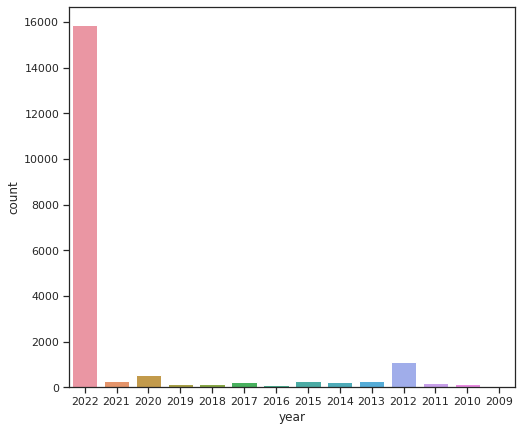

In [ ]:
plt.figure(figsize=(8,7))
p = sns.countplot(x='year',  data = data)

**Interpretasi**

**Dapat dilihat dari bar chart di atas, jumlah tweet terbanyak ada di tahun 2022. Sedangkan jumlah tweet paling sedikit ada di tahun 2009. Hal ini dapat disebabkan karena pada tahun 2022 terjadi banyak gempa yang menimbulkan banyak kerusakan dan korban jiwa. Selain itu, pada tahun 2022 kemungkinan pengguna twitter meningkat dibanding tahun-tahun sebelumnya. Sehingga banyak orang yang melakukan update mengenai gempa Jawa Barat di twitter.**

**Pada tahun 2009 juga terjadi gempa di Tasikmalaya, Jawa Barat dengan kekuatan 7.3 Magnitudo dan menimbulkan banyak kerusakan dan korban jiwa (https://www.liputan6.com/news/read/4050927/gempa-tasikmalaya-yang-menggetarkan-pulau-jawa-satu-dekade-lalu). Namun pada tahun tersebut, kemungkinan pengguna twitter belum banyak. Sehingga tidak banyak tweet mengenai gempa Jawa Barat di tahun 2009.**

**Selanjutnya, akan dianalisis lebih lanjut mengenai data tweet pada tahun 2022. Sebelumnya, data tweet pada tahun 2022 akan disimpan pada `data22`**

In [ ]:
data22= data[data['year']=='2022']

**Akan dibuat bar chart data tweet di tahun 2022 berdasarkan bulan.**

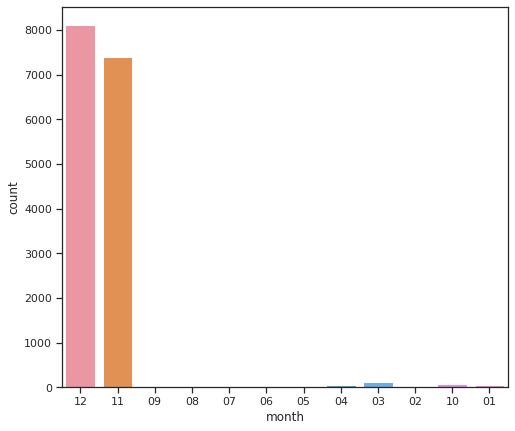

In [ ]:
plt.figure(figsize=(8,7))
p = sns.countplot(x='month',  data = data22)

**Interpretasi**

**Dapat dilihat dari bar chart di atas, jumlah tweet terbanyak di tahun 2022 terjadi di bulan Desember, kemudian kedua terbanyak pada bulan November. Hal ini dapat disebabkan karena adanya gempa di Cianjur pada bulan November dan gempa di Sukabumi pada bulan Desember.**

**Selanjutnya, akan dilihat banyak tweet di setiap tanggal pada bulan November 2022 dan Desember 2022. Sebelumnya, akan dibuat kolom `tanggal` dan `time` yang berasal dari kolom `day time`.**

In [ ]:
data22[["tanggal" ,"time"]] = data22["day time"].str.split(" ", expand = True)
data22.head()

,day,date,username,tweet,nlikes,nreplies,nretweets,year,month,day time,tanggal,time
0,6,2022-12-24 05:50:34,EMSC,#Earthquake (#gempa) M2.7 strikes 17 km NE of ...,1,0,0,2022,12,24 05:50:34,24,05:50:34
1,6,2022-12-24 05:21:20,sukabumiNewsnet,Garis Sukabumi Raya Lakukan Trauma Healing unt...,0,0,0,2022,12,24 05:21:20,24,05:21:20
2,5,2022-12-23 16:28:21,KuretaID,"Jumat Siang Ini Sukabumi Diguncang Gempa 3,1 M...",0,0,0,2022,12,23 16:28:21,23,16:28:21
3,5,2022-12-23 11:55:35,EMSC,#Earthquake (#gempa) M2.7 strikes 25 km NE of ...,3,0,1,2022,12,23 11:55:35,23,11:55:35
4,5,2022-12-23 08:17:34,sofi_hwajiyong,BMKG Deteksi Gempa Magnitudo 3.1 di Kabupaten ...,1,0,0,2022,12,23 08:17:34,23,08:17:34


**Kemudian, dibuat bar chart banyak tweet di setiap tanggal pada bulan November 2022.**

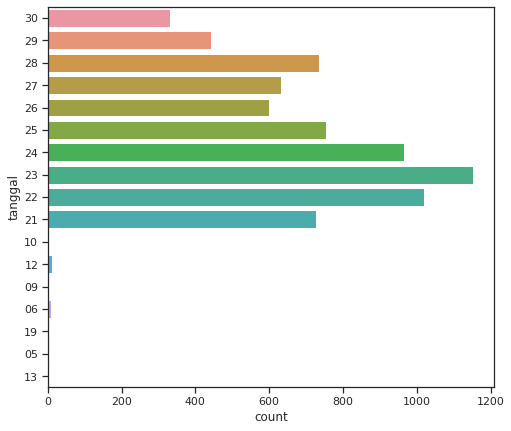

In [ ]:
plt.figure(figsize=(8,7))
p = sns.countplot(y='tanggal',  data = data22[data22['month']== '11'])

**Interpretasi**

**Pada bulan November 2022, tweet paling banyak ada di tanggal 23. Gempa di Cianjur terjadi pada tanggal 21 November 2022. Akan tetapi, tweet terbanyak ada di tanggal 23. Hal ini bisa saja disebabkan karena, masih banyaknya update informasi mengenai korban, kerusakan, donasi, dan berita lainnya yang terkait.**

**Kemudian, dibuat bar chart banyak tweet di setiap tanggal pada bulan Desember 2022.**

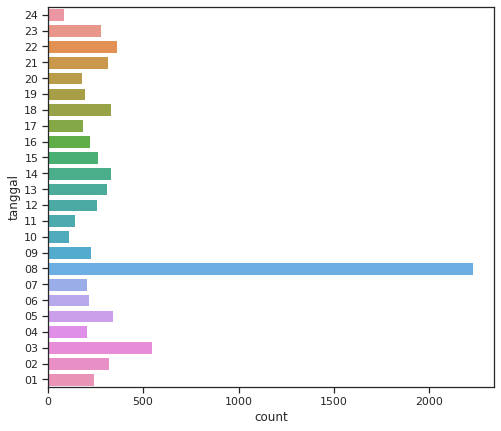

In [ ]:
plt.figure(figsize=(8,7))
p = sns.countplot(y='tanggal',  data = data22[data22['month']== '12'])

**Interpretasi**

**Pada bulan Desember 2022, tweet mengenai gempa jawa barat paling banyak ditemukan pada tanggal 8, karena pada tanggal tersebut terjadi gempa di Sukabumi.**

**Setelah ini, data akan ditinjau berdasarkan username. Akan dihitung terlebih dahulu, jumlah tweet dari masing-masing username.**

In [ ]:
data['username'].value_counts().to_frame()

,username
detikcom,125
M_ninetySix_You,121
tauberitamedia,101
Jennife93282124,87
pikiran_rakyat,66
...,...
AngelaH35379480,1
WidiJanuar_,1
jinnielxo,1
RafIndrasta,1


**Dapat dilihat di atas, 10 username dengan tweet mengenai gempa Jawa Barat terbanyak. Selanjutnya, akan dibuat bar chart mengenai username tersebut. Dibuat terlebih dulu `datauser` yang menyimpan data untuk 10 username di atas.**

In [ ]:
datauser=data.loc[data['username'].isin(['detikcom', 'M_ninetySix_You','tauberitamedia', 'Jennife93282124', 'pikiran_rakyat','tvOneNews',	'kompascom',
                                         'republikaonline', 'tempodotco',	'bmkgwilayah2'])]
datauser.shape

(768, 10)

**Kemudian, dibuat bar chart dari `datauser` tersebut.**

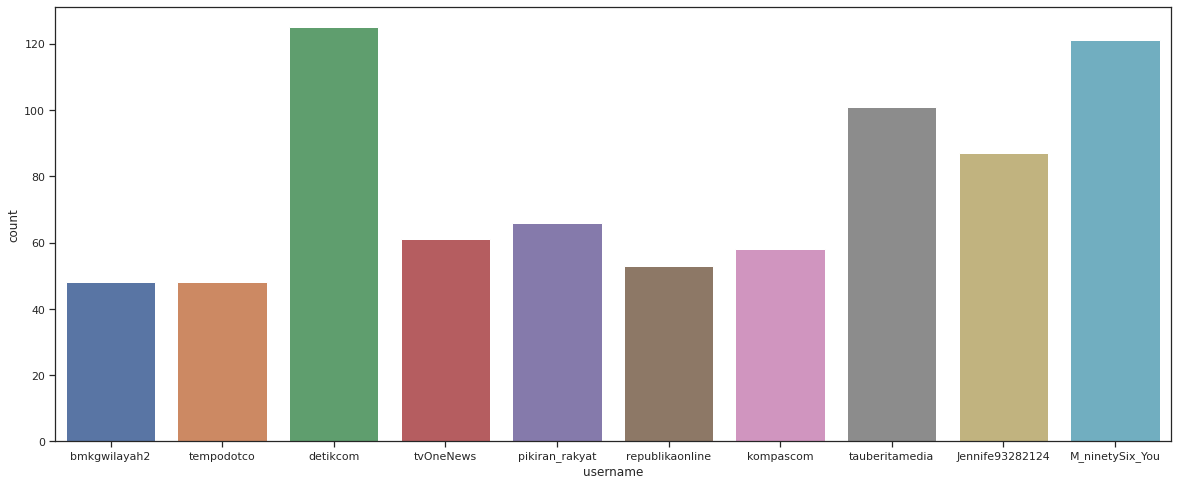

In [ ]:
plt.figure(figsize=(20,8))
p = sns.countplot(x='username',  data = datauser)

**Interpretasi**

**10 akun dengan tweet mengenai gempa Jawa Barat terbanyak yaitu sebagai berikut:**


**1.   detikcom**

**2. M_ninetySix_You**

**3. tauberitamedia**

**4. Jennife93282124**

**5. pikiran_rakyat**

**6. tvOneNews**

**7. kompascom**

**8. republikaonline**

**9. tempodotco**

**10. bmkgwilayah2**

**Mayoritas dari 10 akun di atas merupakan akun kanal berita yang sering melakukan update informasi mengenai gempa di Jawa Barat. Sedangkan akun lainnya, yaitu "M_ninetySix_You" dan "Jennife93282124" sering menyebarkan informasi mengenai donasi.**

**Berdasarkan EDA yang telah dilakukan, dapat dilihat bahwa peran media sosial twitter mengenai gempa di Jawa Barat sangat penting. Hal ini juga memberikan manfaat bagi warga sekitar dan warga yang terdampak.**

# **6. Visualisasi** **Teks**

**Visualisasi text akan dilakukan pada kolom `cleantweet` dengan menggunakan *voyant*. File yang diupload pada *voyant* adalah file txt yang sebelumnya sudah dibuat. Dengan memasukkan kata sebanyak 125, didapat visualisasi teks sebagai berikut.**

![picture](https://drive.google.com/uc?id=1ZQwF79TOgUeKJeaZ9WAjDUC-UjOGGVVf)

**Dapat dilihat dari visualisasi di atas, terdapat beberapa kata yang sangat banyak muncul seperti gempa, cianjur, bencana, donasi, korban, sukabumi, dan lain-lain. Kemudian dapat dilihat juga terdapat huruf b,i,n yang muncul sedikit besar pada visualisasi di atas. Ketiga huruf tersebut sebenarnya membentuk kata BIN, namun karena adanya pemisahan kata pada hashtags, BIN jadi terpisah menjadi 3 huruf yaitu b,i, dan n. Terdapat pula kata rusa, dimana ini adalah hasil stemming dari kata berimbuhan yang memiliki kata dasar rusak. Karena proses stemming hanya menghilangkan imbuhan, tanpa memproses lebih lanjut katanya, maka kata-kata seperti kerusakan berubah menjadi rusa.**

**Dari kata-kata di atas, akan dianalisis lebih lanjut beberapa kata yang terlihat muncul agak besar di visualisasi di atas. Yaitu korban, donasi, posko, dan rusa. Atau, rusa disini berarti rusak**

## **6.1 Posko**

**Dengan cara melihat tweet yang mengandung kata posko dari data yang ada, ditemukan bahwa tweet yang mengandung kata posko kebanyakan membicarakan hal berikut ini dengan contoh tweet sebagai berikut:**

1.   **Pembukaan posko bencana dan upaya bantuan di posko**

"BIN buka posko kemanusiaan bantu ratusan pengungsi korban gempa cianjur #BINResponCepatBencanaAlam #BINPeduliKorbanBencana #BINTurutBerdukaGempaCianjur #BINHadirCepatUntukRakyat #BINPeduliSesama  https://t.co/6CvqSItYmp"

2.   **Tokoh masyarakat mengunjungi posko bencana**

"Menteri Pertahanan Republik Indonesia #Prabowo Subianto kembali mengecek masyarakat posko pengungsi terdampak gempa di Desa Cijedil Cianjur. Prabowo mengecek sarana dan prasarana termasuk dapur umum untuk mengetahui kebutuhan yang diperlukan masyarakat. #Prabowo #kerjasama"

3. **Penyaluran bantuan dan donasi ke posko bencana**

"Wuling bersama Rumah Zakat salurkan bantuan untuk warga terdampak gempa di Cianjur.  Salah satu titik posko pengungsian yang mendapatkan bantuan ini adalah Kecamatan Cugenang, Kampung Poponcol Rt04 Rw01 dengan total KK mengungsi sebanyak 66 KK dan 224 jiwa.  https://t.co/Itq4MaF5w1"



## **6.2 Korban**

**Dengan cara melihat tweet yang mengandung kata korban dari data yang ada, ditemukan bahwa tweet yang mengandung kata korban kebanyakan membicarakan hal berikut ini dengan contoh tweet sebagai berikut:**

1.   **Kunjungan pada korban**

"Saya menjenguk para korban luka akibat gempa Cianjur yang sedang mendapat perawatan dan mengunjungi posko pengungsian untuk memastikan para korban gempa mendapat bantuan secara maksimal dan terpenuhi segala kebutuhannya. #prayforcianjur #gempabumicianjur #polripresisi  https://t.co/V8s3ObdcUg"

2.   **Ucapan belasungkawa terhadap korban**

"Turut berduka untuk korban gempa bumi Cianjur, Garut, Sukabumi. 🥀🥀  https://t.co/CcOImP3zwO"

3. **Berita mengenai jumlah korban**

"Gempa Bumi Magnitudo 5,8 Guncang Sukabumi, Sejumlah Rumah dan Bangunan Rusak, Tak Ada Korban Jiwa    https://t.co/aE3AafSxvH via @tribunmedan"

4. **Penyaluran donasi oleh lembaga pemerintah serta non pemerintah, masyarakat, dan tokoh masyarakat**

"PMI Salurkan Bantuan untuk Korban Gempa di Sukabumi dan Cianjur  https://t.co/b1udOAlwA2 #Pmi #Bantuan #KorbanGempa #KabupatenSukabumi"

## **6.3 Donasi**

**Dengan cara melihat tweet yang mengandung kata donasi dari data yang ada, ditemukan bahwa tweet yang mengandung kata donasi kebanyakan membicarakan hal berikut ini dengan contoh tweet sebagai berikut:**

1. **Penyaluran donasi oleh Lembaga pemerintah serta non-pemerintah, masyarakat dan tokoh masyarkat​**

"OJK Dan Industri Jasa Keuangan Salurkan Donasi Bantu Korban Gempa Bumi Di Cianjur  https://t.co/QlzMZpMmrR​"

2. **Berbagai bentuk donasi diterima oleh para korban​**

"Ajinomoto Indonesia bekerjasama dengan BAZNAS dalam memberikan bantuan kepada korban gempa di Cianjur.  Bantuan yang diberikan berupa produk Masako, Saori Saos Tiram, mie instan YumYum serta donasi untuk pembangunan fasilitas umum yang hancur karena gempa bumi tersebut.  https://t.co/6k9nAcLPhe​"

## **6.4 Rusak**

**Dengan cara melihat tweet yang mengandung kata rusak dari data yang ada, ditemukan bahwa tweet yang mengandung kata rusak kebanyakan membicarakan hal berikut ini dengan contoh tweet sebagai berikut:**

# **7. Social Network Analytics**

## **7.1 Graph**

**Sebelum melakukan Social Network Analytics, dibuat terlebih dulu graf yang akan digunakan. Pertama-tama akan diimport module yang akan digunakan, seperti networkx dan operator.**

In [ ]:
import warnings; warnings.simplefilter('ignore')
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, networkx as nx
import operator

seed = 0
np.random.seed(seed)
"Done"

'Done'

**Selanjutnya, akan dibuat 2 list yaitu `users` dan `tweets` yang akan menyimpan data pada kolom `username` dan `tweet` ke dalam list. Kemudian untuk melihat beberapa isi list dilakukan print data dari kedua list tersebut.**

In [ ]:
users = data.username.to_list()
tweets = data.tweet.to_list()
print( users[:5] )
print( tweets[:5])

['EMSC', 'sukabumiNewsnet', 'KuretaID', 'EMSC', 'sofi_hwajiyong']
['#Earthquake (#gempa) M2.7 strikes 17 km NE of #Sukabumi (#Indonesia) 8 min ago. More info:  https://t.co/ntwgOBVWSX', 'Garis Sukabumi Raya Lakukan Trauma Healing untuk anak-anak korban Gempa Cianjur  Selengkapnya di #sukabumiNews | #MediaLokalBerwawasanInternasional 👇  https://t.co/LE2fbHdjbu  https://t.co/aoAxRAwSiJ', 'Jumat Siang Ini Sukabumi Diguncang Gempa 3,1 Magnitudo  https://t.co/JiMpTGbUkq', '#Earthquake (#gempa) M2.7 strikes 25 km NE of #Sukabumi (#Indonesia) 14 min ago. More info:  https://t.co/VJQZcu7f2E', 'BMKG Deteksi Gempa Magnitudo 3.1 di Kabupaten Sukabumi Jawa Barat #BMKG #Gempa #gempaterkini #gempasukabumi #sukabumi #JawaBarat #Jabar #23Desember #Breaking_news #updates  https://t.co/cxbrH6g0NF']


**Kemudian, inisialisasi suatu graf kosong G. Kode pada baris kedua di bawah, bertujuan untuk menambahkan nodes/vertex/simpul yaitu berupa semua username pada list `users`. Untuk mengetahui jumlah vertex dan edges, dilakukan perintah print.**

In [ ]:
G = nx.Graph() # Graph Kosong Baru
G.add_nodes_from(users)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  9964
Banyak Edges =  0


**Untuk menambahkan edges pada graf tersebut. Dilakukan loop berikut ini. Dimana, edges akan ditambahkan apabila tweet yang dilakukan user tersebut menyebutkan/mention user lainnya. Lalu, diberikan perintah print kembali untuk melihat update jumlah vertex dan edges.**

In [ ]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  11985
Banyak Edges =  4259


**Setelah graf jadi, selanjutnya akan dianalisis mengenai centrality dan community di dalam graf tersebut. Berikut ini prosesnya.**

## **7.2 Centrality Analysis**

**Centrality Analysis adalah cara untuk mengetahui siapakah user yang paling berpengaruh dalam suatu topik di media sosial. Centrality bisa ditentukan berdasarkan jaringan pertemanan, komentar atau pun interaksi user dengan user lainnya. Berikut ini beberapa jenis dari centrality antara lain:**


*   **Centrality by Degree**
*   **Closeness Centrality**
* **Betweenness Centrality**
* **Eigenvector Centrality**

**Berikut ini, akan dilakukan centrality analysis berdasarkan beberapa metode di atas.**



**Sebelumnye, didefinisikan fungsi Centrality yang akan menampilkan vertex/user yang memiliki nilai centrality terbesar sesuai dengan metodenya.**

In [ ]:
def Centrality(G, N=10, method='katz', outliers=False, Label = True, layOut='shells'):
    if method.lower()=='katz':
        phi = 1.618033988749895 # largest eigenvalue of adj matrix
        ranking = nx.katz_centrality_numpy(G,1/phi)
    elif method.lower() == 'degree':
        ranking = nx.degree_centrality(G)
    elif method.lower() == 'eigen':
        ranking = nx.eigenvector_centrality_numpy(G)
    elif method.lower() =='closeness':
        ranking = nx.closeness_centrality(G)
    elif method.lower() =='betweeness':
        ranking = nx.betweenness_centrality(G)
    elif method.lower() =='harmonic':
        ranking = nx.harmonic_centrality(G)
    elif method.lower() =='percolation':
        ranking = nx.percolation_centrality(G)
    else:
        print('Error, Unsupported Method.'); return None

    important_nodes = sorted(ranking.items(), key=operator.itemgetter(1))[::-1]#[0:Nimportant]
    data = np.array([n[1] for n in important_nodes])
    dnodes = [n[0] for n in important_nodes][:N]
    if outliers:
        m = 1 # 1 standard Deviation CI
        data = data[:N]
        out = len(data[abs(data - np.mean(data)) > m * np.std(data)]) # outlier within m stDev interval
        if out<N:
            dnodes = [n for n in dnodes[:out]]

    print('Influencial Users: {0}'.format(str(dnodes)))
    print('Influencial Users Scores: {0}'.format(str(data[:len(dnodes)])))
    Gt = G.subgraph(dnodes)
    return Gt

**Kemudian didefinisikan juga fungsi drawGraph untuk menampilkan graf dari user yang termasuk dalam influencial users berdasarkan centrality berbagai metode.**

In [ ]:
def drawGraph(G, Label, layOut='spring', graphStyle=False, K = 200):
    if graphStyle:
        ranking = nx.degree_centrality(G)
        warna = list(ranking.values())
        d = nx.degree(G)
        d = [d[node]*K for node in G.nodes()]
        pos = nx.spring_layout(G) # Spring LayOut
        nx.draw_networkx_nodes(G,pos, node_color=warna,node_size=d) # Gambar Vertex
        nx.draw_networkx_edges(G,pos,width=2,alpha=0.1) # Gambar edges
        nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
        plt.show() # Show the graph
    else:
        if layOut.lower()=='spring':
            pos = nx.spring_layout(G)
        elif layOut.lower()=='circular':
            pos=nx.circular_layout(G)
        elif layOut.lower()=='random':
            pos = nx.random_layout(G)
        elif layOut.lower()=='shells':
            shells = [G.core_nodes,sorted(G.major_building_routers, key=lambda n: nx.degree(G.topo, n)) + G.distribution_routers + G.server_nodes,G.hosts + G.minor_building_routers]
            pos = nx.shell_layout(G, shells)
        elif layOut.lower()=='spectral':
            pos=nx.spectral_layout(G)
        else:
            print('Graph Type is not available.')
            return
        nx.draw_networkx_nodes(G,pos, alpha=0.2,node_color='blue',node_size=600)
        if Label:
            nx.draw_networkx_labels(G,pos)
        nx.draw_networkx_edges(G,pos,width=4)
        plt.show()

**Centrality by Degree**

In [ ]:
Gd = Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['infoBMKG', 'jokowi', 'erickthohir', 'Biang05553051', 'anonapostate', 'illness_dd3', 'ridwankamil', 'tanyakanrl', 'bankmandiri', 'infobdg']
Influencial Users Scores: [0.02052737 0.00792724 0.00575768 0.00408879 0.00367156 0.00358812
 0.00350467 0.00317089 0.00308745 0.00300401]


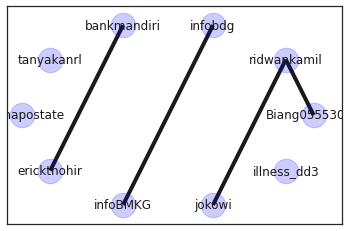

In [ ]:
drawGraph(Gd, True, layOut='circular')

**Berdasarkan analisis Centrality by Degree di atas, didapat user yang memiliki nilai Centrality by Degree paling tinggi yaitu InfoBMKG. Artinya InfoBMKG adalah user yang paling sering di-mention atau me-mention user lainnya. Kemudian yang tertinggi selanjutnya yaitu jokowi dan dilanjutkan oleh erickthohir.**

**Closeness Centrality**

In [ ]:
Gc = Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['ridwankamil', 'jokowi', 'infoBMKG', 'RadioElshinta', 'medcom_id', 'M_ninetySix_You', 'iyak1230', 'KompasTV', 'AntonPr12594871', 'SonoraFM92']
Influencial Users Scores: [0.04243382 0.0417641  0.04099628 0.04087385 0.04064366 0.04045724
 0.04004903 0.03878882 0.0385777  0.03814762]


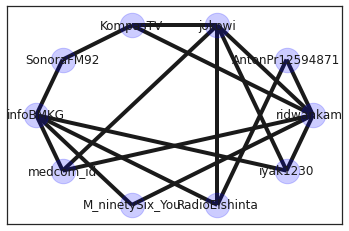

In [ ]:
drawGraph(Gc, True, layOut='circular')

**Berdasarkan analisis Closeness Centrality di atas, didapat bahwa user yang memiliki nilai Closeness Centrality paling tinggi yaitu ridwankamil. Artinya ridwalkamil adalah user yang memiliki hubungan antar user lainnya paling banyak. Akibatnya user ridwankamil akan menyebarkan informasi lebih cepat kepada user lainnya karena dinilai dekat dengan user-user lainnya.**

**Betweeness Centrality**

In [ ]:
Gb = Centrality(G, N=10, method='betweeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['infoBMKG', 'jokowi', 'ridwankamil', 'M_ninetySix_You', 'Biang05553051', 'BNPB', 'infocianjur', 'RadioElshinta', 'AntonPr12594871', 'nan_priatna']
Influencial Users Scores: [0.01388897 0.01311906 0.01106208 0.0080238  0.00564422 0.00352868
 0.00346288 0.00322798 0.00292892 0.00263441]


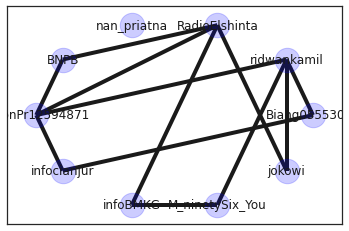

In [ ]:
drawGraph(Gb, True, layOut='circular')

**Berdasarkan analisis Betweeness Centrality di atas, didapat bahwa user yang memiliki nilai Betweeness Centrality paling tinggi yaitu infoBMKG. Artinya infoBMKG adalah user yang memiliki peran penting dalam hubungan antara akun-akun lainnya. Akibatnya tanpa user infoBMKG, hubungan dari user lainnya akan  berkurang atau terputus. Atau, informasi akan terputus jika tidak ada user infoBMKG**

**Eigenvector Centrality**

In [ ]:
try:
  Ge = Centrality(G, N=10, method='eigen', outliers=False, Label = True, layOut='spring')
except AttributeError:
  print("Bagian ini dapat menampilkan output jika di run di python")

Bagian ini dapat menampilkan output jika di run di python


In [ ]:
try:
  drawGraph(Ge, True, layOut='circular')
except (AttributeError, NameError, RuntimeError):
  print("Bagian ini dapat menampilkan output jika di run di python")

Bagian ini dapat menampilkan output jika di run di python


**Berdasarkan analisis Eigenvector Centrality di atas, diadapat bahwa user yang memiliki nilai Eigenvector Centrality paling besar adalah infoBMKG. Artinya infoBMKG inilah yang merupakan tokoh penting dalam jaringan sosial ini. Atau artinya, infoBMKG merupakan tokoh yang penting dalam peyebaran tweet mengenai gempa di jawa barat.**

## **7.3 Community**

**Selain menganalisis centrality, akan dianalisis juga community yang terjadi pada tweet dan user yang ada pada data. Berikut ini proses community detection pada network yang sebelumnya didefinisikan. Hanya akan ditampilkan 50 community teratas untuk efisiensi. Sehingga hanya akan dilakukan loop hingga nilai `i` = 50**

In [ ]:
Gcom = nx.algorithms.community.greedy_modularity_communities(G)
i = 1
for community in Gcom:
  if i<50:
    print(community)
    i = i+1

frozenset({'TerongU72356816', 'RonalSihotang78', 'uncntrlllll', 'hyuckyoja', 'tapi_gaenakan', 'asto_zone', 'piyakuu', 'its_trii', 'SilviNu80861815', 'justnad1ne', 'Resass10', 'AYOPalembang', 'deviyantilumba1', 'herlandiio', 'Abihoyongwin_', 'rebecc39552721', 'DMCDompetDhuafa', 'asepmsi', 'whattson00', 'KAI121', 'aegigom_', 'jpnncom', 'diswayid', 'humasBMKG', 'PVMBG', 'aa_idud', 'ara1991_arum', 'arfendi35', 'xo_blackpearl', 'dedeomat', 'SabaniIban3', 'jackle_richard', 'nurulmuthiahth', 'AkmalNugraha8', 'wahyuBONEX', 'TenguLawaxx', 'fadilahilLmah', 'ZoRioNa_SkAists', 'mgsapitri', 'mavelyin', 'ameliaagustinm', 'Galih', 'sahrulgunawan08', 'BudiHartopo5', 'FFathkidsc', '_echanis', 'putriaprl17', 'andri', 'Marlina08451612', 'Red_Sky___', 'andri_parcox', 'sadgirkampoeng', 'CityShj', 'rurisa1428', 'Cangtip03', 'SukabumiFace', 'lhayesno', 'Bp_HasbiJunaedi', 'miladewy', 'ARHS91194089', 'ageumeus_', 'Asritami1', 'armangunawan34', 'alittheassassin', 'Bebekbetutu141', 'hardboyys', 'loidfourger', 'a

**Berdasarkan output tersebut, didapat beberapa komunitas yang terdeteksi.**

## **7.4 Visualisasi Gephi**

![picture](https://drive.google.com/uc?id=1KmjDDdTu2cszY8fq3Pc5jtqFHPgniXz9)

**Dengan menggunakan gephi, didapatkan visualisasi graf seperti gambar di atas. Ukuran dari nodes yang ada disesuaikan dengan in-degree, sedangkan warna dari nodes berdasarkan modularity. Modularity ini dapat menunjukkan atau mendeteksi adanya komunitas dalam suatu jaringan. Nodes-nodes yang berwarna sama berada dalam satu komunitas yang sama.**

**Berdasarkan gambar di atas, dapat kita lihat user yang berada dalam nodes dari yang terbesar urutannya adalah infoBMKG, jokowi, erickthohir, dan ridwan kamil. Artinya keempat user inilah yang banyak dimention oleh user lainnya dalam tweet mengenai gempa di Jawa Barat.**

**Username @infoBMKG banyak dimention karena BMKG merupakan lembaga negara yang bergerak di bidang terkait gempa dan melakukan update mengenai gempa di Jawa Barat. Selanjutnya, username @jokowi merupakan Presiden RI sehingga respon dari beliau dinantikan oleh masyarakat. Kemudian, username @ridwankamil merupakan Gubernur Jawa Barat sehingga respon dari beliau pun dinantikan oleh masyarakat serta sebagai gubernur, username @ridwankamil banyak mengupdate informasi mengenai gempa di Jawa Barat. Terakhir, username @erickthohir adalah Menteri BUMN dan pada gempa Jawa Barat 2022, Erick Thohir mengunjungi secara langsung lokasi yang terdampak gempa.**

**Selanjutnya, keempat user ini akan diteliti lebih lanjut untuk mengetahui alasan atau isi tweet dari user lain yang menyebutkan empat user di atas dalam tweetnya.**


### **@infoBMKG**

User twitter lain me-mention akun @infoBMKG tentang:
1. Harapan dan kekhawatiran agar tidak ada korban saat gempa dan tidak ada gempa susulan

"**@infoBMKG** Ya Allah sukabumi. Semoga ga ada gempa susulan. Aman aman aja"

2. Keadaan saat gempa

"**@infoBMKG** Ya Allah gue lagi mandi barusan, ternyata ada gempa di sukabumi Kerasa guncangannya sampe Bandung meskipun kecil"
3. Pertanyaan dan pemberitahuan saat ada gempa

"**@infoBMKG** Baru saja terasa gempa di Sukabumi lumayan terasa besar tapi hanya sekitar 1-2 detik. Kira-kira pusat episentrumnya di mana ya, min?"
4. Info gempa

"08.00 #InfoSonora  #Gempa Mag:3.5, 27-Nov-22 07:21:30 WIB, Lok:6.92 LS, 106.79 BT (Pusat gempa berada di darat 15 km Barat Daya kota Sukabumi), Kedlmn:10 Km Dirasakan (MMI) II - III Gunung Guruh, III Cibadak, II Bogor #BMKG **@infoBMKG**  https://t.co/nAYMXQV5bX"

### **@jokowi**

User twitter lain me-mention akun @jokowi tentang:
1. Presiden Joko Widodo meninjau langsung keadaan tempat yang terdampak gempa

"Presiden **@jokowi** Tinjau Dampak Gempa di Ponpes Darul Falah Cianjur  Presiden Joko Widodo meninjau Pondok Pesantren (Ponpes) Darul Falah, Desa Jambudipa, Kecamatan Warungkondang, Kabupaten Cianjur, dalam kunjungan kerjanya ke Provinsi Jawa Barat, pada Senin, 5 Desember 2022.  https://t.co/bGoVYJmvUl"

2. Adanya penyaluran donasi dari suatu lembaga

"Kegiatan penyaluran donasi bencana alam gempa Cianjur. Tim satgas bencana SMKN 1 Cihampelas memberikan secara langsung ke lokasi terdampak di kampung cugeunang yg merupakan daerah terparah dampak gempa. @cadisdik6 @disdik_jabar @ridwankamil @ata_lia **@jokowi**  https://t.co/xW0SLzsdna"
3. Pemberian bantuan oleh Presiden Joko Widodo

"Presiden **@jokowi** Beri Bantuan Korban Gempa Cianjur. Bantuan tsb terdiri atas Rp50 juta untuk rumah yg mengalami kerusakan berat, Rp25 juta untuk rumah yg mengalami kerusakan sedang, dan Rp10 juta untuk rumah yg mengalami kerusakan ringan.   https://t.co/qvNPjhmdjD"

### **@erickthohir**

User twitter lain me-mention akun @erickthohir tentang:
1. Ajakan Menteri Erick Thohir untuk saling membantu warga terdampak gempa

"Menteri BUMN **@erickthohir** mengajak kepada seluruh pihak, khususnya Badan Usaha Milik Negara dan masyarakat untuk saling bergotong royong sebagai satu kesatuan keluarga besar, untuk membantu pemulihan dampak akibat bencana alam gempa bumi di Cianjur Jawa Barat. #BangkitBersamaET  https://t.co/4gJJPRPGR5"

2. Apresiasi masyarakat atas bantuan Erick Thohir

"Langkah cepat kak **@erickthohir** dengan #SatgasBencanaBUMN untuk membantu penanganan dampak gempa bumi di Cianjur Jawa Barat. #BangkitBersamaET"

3. Penyaluran bantuan secara langsung oleh Erick Thohir

"Sobat BUMN,  Untuk meringankan beban masya akat yang terdampak akibat gempa bumi di Cianjur, Jawa Barat **@erickthohir** turun langsung ke lokasi untuk menyalurkan bantuan.  #SatgasBencanaBUMN #BUMNuntukCianjur #InjourneyUntukCianjur  https://t.co/BVEqjGaM8d"

### **@ridwankamil**

1. Kunjungan langsung Gubernur Jawa Barat Ridwan Kamil ke lokasi terdampak gempa Cianjur

"Hari ini (22/11) Presiden @jokowi dan Gubernur Jawa Barat **@ridwankamil** berkunjung ke Cianjur, Jawa Barat. Kedatangan Jokowi dan Ridwan Kamil untuk melihat langsung dampak dan korban gempa Cianjur. Setibanya di lokasi, Jokowi meninjau langsung dampak bencana gempa bumi.  https://t.co/dTKUdhYqs0"

2. Pemberian informasi dari Ridwan Kamil mengenai korban gempa

"Gubernur Jawa Barat **@ridwankamil** mengatakan ada penambahan korban jiwa dampak gempa 5,6 magnitudo di Kabupaten Cianjur, Jawa Barat, Senin (21/11). Menurutnya, tercatat hingga Senin malam jumlah korban meninggal bertambah menjadi 162 orang.    https://t.co/A57VmjzaIy  https://t.co/Mgz4ehWrrf"

# **8. Kesimpulan**

1. **Tweet mengenai gempa cianjur paling banyak di tahun 2022 pada bulan November dan Desember.**
2. **Pada bulan November, tweet mengenai gempa melonjak di tanggal 21 karena terjadi di gempa di tanggal 21 November 2022. Sedangkan tanggal-tanggal selanjutnya di bulan November mulai banyak tweet mengenai kerusakan, korban jiwa dan respon user terhadap gempa di Cianjur.**
3. **Pada bulan Desember di tanggal 8 Desember tweet mengenai gempa melonjak akibat gempa yang terjadi di Sukabumi.**
4. **Mayoritas 10 akun  yang sering tweet mengenai gempa di jawa barat adalah kanal berita serta akun yang meminta donasi bagi korban gempa.**
5. **Terdapat beberapa akun yang berperan penting dalam penyebaran informasi mengenai gempa Jawa Barat, yaitu akun @infobmkg, @jokowi, @erickthohir, dan @ridwankamil.**

# **Pembagian Tugas**

**Pembuatan Laporan**
* Pendahuluan : Vania
*   Pengambilan data dari twitter : Anatasya, Athaya, Chika, Vania
*   Preprocessing Data Type, Duplicated, Missing Value : Anatasya, Athaya, Vania
* Preprocessing Tokenizing : Athaya
* Preprocessing Normalisasi : Vania
* Preprocessing Filtering : Anatasya
* Preprocessing Stemming : Chika
* EDA : Anatasya, Athaya, Vania
* Visualisasi teks voyant : Anatasya, Athaya, Chika, Vania
* Meneliti kata Posko : Athaya
* Meneliti kata Korban : Anatasya
* Meneliti kata Donasi : Vania
* Meneliti kata Rusak : Chika
* SNA pembentukan graf : Athaya
* SNA Centrality Analysis : Anatasya, Athaya, Chika, Vania
* SNA Community : Anatasya, Athaya, Chika, Vania
* Visualisasi Gephy : Anatasya, Vania
* Meneliti mention @infoBMKG : Athaya
* Meneliti mention @jokowi : Vania
* Meneliti mention @erickthohir : Anatasya
* Meneliti mention @ridwankamil : Chika
* Kesimpulan : Anatasya

**Pembuatan PPT**
* Pendahuluan : Vania
* Pengambilan data : Athaya
* Import package dan data : Athaya
* Feature Selection : Vania
* Preprocessing : Vania (data type, normalisasi), Athaya (tokenizing), Anatasya (duplicate, missing value, filtering), Chika (stemming)
* EDA : Chika
* Visualisasi teks : Anatasya (korban), Athaya(visualisasi, posko), Chika (rusak), Vania (donasi)
* SNA : Anatasya (centrality analysis, centrality by degree, closeness centrality), Athaya (inisialisasi graph, fungsi centrality, betweeness centrality, eigenvector centrality, @infoBMKG), Vania (community detection, visualisasi gephy, @jokowi, @erickthohir, @ridwankamil)
* Kesimpulan : Anatasya


**Video Presentasi**
* Pendahuluan : Athaya
* Pengambilan data : Athaya
* Import package dan data : Athaya
* Feature Selection : Athaya
* Preprocessing : Athaya
* EDA : Athaya dan Vania
* Visualisasi teks : Vania
* SNA : Chika dan Anatasya
* Kesimpulan : Anatasya